In [1205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1206]:
df=pd.read_csv("INFY.csv",index_col='Date',parse_dates=True)

In [1207]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


# Data Preprocessing

In [1208]:
df['Date']=df.index

In [1209]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1210]:
df=df.loc[mask]

In [1211]:
df=df.ffill()

In [1212]:
df['Prev Close'].isnull().values.any()

False

In [1213]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1214]:
df.dropna(inplace=True)

<AxesSubplot:>

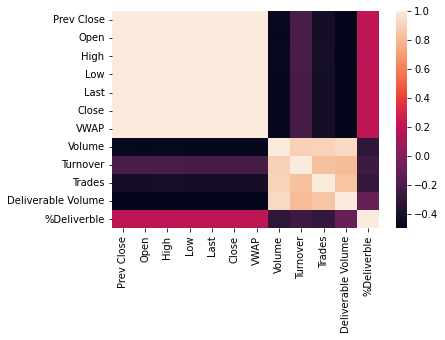

In [1215]:
sn.heatmap(df.corr())

In [1216]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [1217]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1218]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1219]:
Decomp_results=seasonal_decompose(df['Prev Close'])

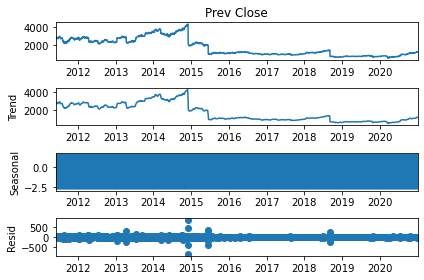

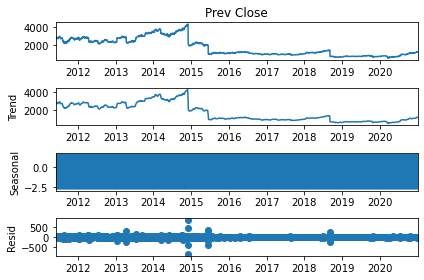

In [1220]:
Decomp_results.plot()

In [1221]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1222]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1223]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18366.914, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17578.477, Time=2.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17874.759, Time=2.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18135.901, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-511.537, Time=1.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18336.384, Time=3.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18294.991, Time=2.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-18356.825, Time=3.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-18363.394, Time=3.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18318.713, Time=2.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-18358.964, Time=3.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18206.383, Time=3.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-18367.844, Time=3.93 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-18361.153, Time=3.89 sec
 ARIMA(

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=-17429.974, Time=4.05 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=-18358.032, Time=4.98 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=-18362.670, Time=4.74 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-18355.587, Time=4.01 sec
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=-18363.914, Time=4.94 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=-18370.546, Time=3.75 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=-18364.678, Time=3.82 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=-18363.139, Time=3.46 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=-17431.995, Time=3.86 sec
 ARIMA(4,1,5)(0,0,0)[0]             : AIC=-18360.018, Time=4.41 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-18369.836, Time=3.63 sec
 ARIMA(3,1,5)(0,0,0)[0]             : AIC=-18364.639, Time=3.94 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-18357.570, Time=3.73 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=-18365.870, Time=4.67 sec

Best model:  ARIMA(4,1,4)(0,0,0)[0]          
Total fit time: 114.309 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:               SARIMAX(4, 1, 4)   Log Likelihood                9205.273
Date:                Sun, 25 Sep 2022   AIC                         -18370.546
Time:                        11:52:44   BIC                         -18254.057
Sample:                             0   HQIC                        -18328.256
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   1.03e-33    9.7e+32      0.000       1.000       1.000
x2         -3.053e-16   9.46e-34  -3.23e+17      0.000   -3.05e-16   -3.05e-16
x3         -7.355e-16   9.27e-34  -7.93e+17      0.000   -7.36e-16   -7.36e-16
x4         -4.372e-16   1.13e-33  -3.88e+17      0.000   -4.37e-16   -4.37e-16
x5           4.51e-16    1.1e-33   4.09e+17      0.000    4.51e-16    4.51e-16
x6           2.22e-16    1.1e-33   2.01e+17      0.000    2.22e-16    2.22e-16
x7         -4.163e-17   1.05e-33  -3.96e+16      0.000   -4.16e-17   -4.16e-17
x8         -6.597e-18   2.27e-28   -2.9e+10      0.000    -6.6e-18    -6.6e-18
x9          1.491e-17   2.62e-20    569.888      0.000    1.49e-17     1.5e-17
x10        -1.756e-17   2.51e-30     -7e+12      0.000   -1.76e-17   -1.76e-17
x11        -5.827e-18   1.13e-28  -5.18e+10      0.000   -5.83e-18   -5.83e-18
ar.L1         -1.0527   3.35e-38  -3.14e+37      0.000      -1.053      -1.053
ar.L2         -0.7021   1.97e-38  -3.57e+37      0.000      -0.702      -0.702
ar.L3         -0.3971   1.65e-38   -2.4e+37      0.000      -0.397      -0.397
ar.L4          0.1591   6.52e-39   2.44e+37      0.000       0.159       0.159
ma.L1          0.4829   2.87e-38   1.68e+37      0.000       0.483       0.483
ma.L2         -0.0816   1.21e-38  -6.74e+36      0.000      -0.082      -0.082
ma.L3         -0.2226   1.33e-38  -1.67e+37      0.000      -0.223      -0.223
ma.L4         -0.5510   4.73e-39  -1.16e+38      0.000      -0.551      -0.551
sigma2      3.783e-05   5.12e-33    7.4e+27      0.000    3.78e-05    3.78e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):           1824717.94
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                            -8.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       134.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.45e+53. Standard errors may be unstable.
"""

# ARIMAX

In [1224]:
model_arimax=ARIMA(train,exog=exo_train,order=(4,1,4))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                 1751
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -7904.750
Method:                       css-mle   S.D. of innovations             66.887
Date:                Sun, 25 Sep 2022   AIC                          15851.500
Time:                        11:53:36   BIC                          15966.327
Sample:                    06-02-2011   HQIC                         15893.946
                         - 02-15-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0016      1.712     -0.001      0.999      -3.357       3.353
Prev Close            -0.9829      0.009   -115.396      0.000      -1.000      -0.966
Open                  -0.0135      0.032     -0.420      0.675      -0.077       0.050
High                   0.1251      0.052      2.418      0.016       0.024       0.227
Low                    0.9553      0.041     23.244      0.000       0.875       1.036
Last                  -0.2574      0.107     -2.406      0.016      -0.467      -0.048
Close                  0.2014      0.130      1.552      0.121      -0.053       0.456
VWAP                  -0.0205      0.091     -0.226      0.821      -0.199       0.158
Volume             -8.179e-08   7.34e-07     -0.112      0.911   -1.52e-06    1.36e-06
Turnover            7.049e-15   2.15e-12      0.003      0.997   -4.21e-12    4.23e-12
Trades              2.884e-05   1.31e-06     22.067      0.000    2.63e-05    3.14e-05
Deliverable Volume -1.804e-06   1.31e-06     -1.380      0.168   -4.37e-06    7.58e-07
ar.L1.D.Low           -0.0033      0.435     -0.008      0.994      -0.855       0.849
ar.L2.D.Low           -0.0002      0.353     -0.001      1.000      -0.692       0.692
ar.L3.D.Low            0.0053        nan        nan        nan         nan         nan
ar.L4.D.Low            0.0156        nan        nan        nan         nan         nan
ma.L1.D.Low           -0.0033      0.415     -0.008      0.994      -0.816       0.809
ma.L2.D.Low           -0.0002      0.335     -0.001      1.000      -0.657       0.657
ma.L3.D.Low            0.0053        nan        nan        nan         nan         nan
ma.L4.D.Low            0.0156        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7548           -0.0000j            2.7548           -0.0000
AR.2           -0.0912           -2.8233j            2.8248           -0.2551
AR.3           -0.0912           +2.8233j            2.8248            0.2551
AR.4           -2.9118           -0.0000j            2.9118           -0.5000
MA.1            1.9189           -1.9904j            2.7647           -0.1279
MA.2            1.9189           +1.9904j            2.7647            0.1279
MA.3           -2.0886           -2.0030j            2.8938           -0.3783
MA.4           -2.0886           +2.0030j            2.8938            0.3783
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1225]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(4,1,4),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                 1752
Model:               SARIMAX(4, 1, 4)   Log Likelihood                6305.008
Date:                Sun, 25 Sep 2022   AIC                         -12570.016
Time:                        11:53:40   BIC                         -12460.657
Sample:                    06-01-2011   HQIC                        -12529.591
                         - 02-15-2018                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close         -2.391e-14   1.94e-33  -1.23e+19      0.000   -2.39e-14   -2.39e-14
Open                 1.23e-13   1.84e-33   6.68e+19      0.000    1.23e-13    1.23e-13
High               -2.465e-13   1.85e-33  -1.33e+20      0.000   -2.46e-13   -2.46e-13
Low                    1.0000   2.12e-33   4.71e+32      0.000       1.000       1.000
Last                2.108e-13   2.07e-33   1.02e+20      0.000    2.11e-13    2.11e-13
Close              -3.268e-13   2.08e-33  -1.57e+20      0.000   -3.27e-13   -3.27e-13
VWAP                5.292e-13   2.01e-33   2.63e+20      0.000    5.29e-13    5.29e-13
Volume              2.338e-17   2.28e-28   1.03e+11      0.000    2.34e-17    2.34e-17
Turnover           -1.783e-17   3.12e-20   -570.933      0.000   -1.79e-17   -1.78e-17
Trades              9.785e-16   2.28e-30   4.28e+14      0.000    9.79e-16    9.79e-16
Deliverable Volume  7.022e-17   1.43e-28   4.91e+11      0.000    7.02e-17    7.02e-17
ar.L1                 -1.1980   2.36e-38  -5.07e+37      0.000      -1.198      -1.198
ar.L2                 -0.9142   2.97e-38  -3.08e+37      0.000      -0.914      -0.914
ar.L3                 -0.4769   3.23e-38  -1.48e+37      0.000      -0.477      -0.477
ar.L4                  0.1608    2.6e-38   6.19e+36      0.000       0.161       0.161
ma.L1                  0.5973   1.54e-38   3.88e+37      0.000       0.597       0.597
ma.L2                  0.0353   1.66e-38   2.13e+36      0.000       0.035       0.035
ma.L3                 -0.2711   2.23e-38  -1.22e+37      0.000      -0.271      -0.271
ma.L4                 -0.6190   1.66e-38  -3.74e+37      0.000      -0.619      -0.619
sigma2              4.426e-05   6.26e-33   7.07e+27      0.000    4.43e-05    4.43e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):           2625876.43
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.47   Skew:                            10.01
Prob(H) (two-sided):                  0.00   Kurtosis:                       191.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+53. Standard errors may be unstable.
"""

# Prediction

In [1226]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1227]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1228]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

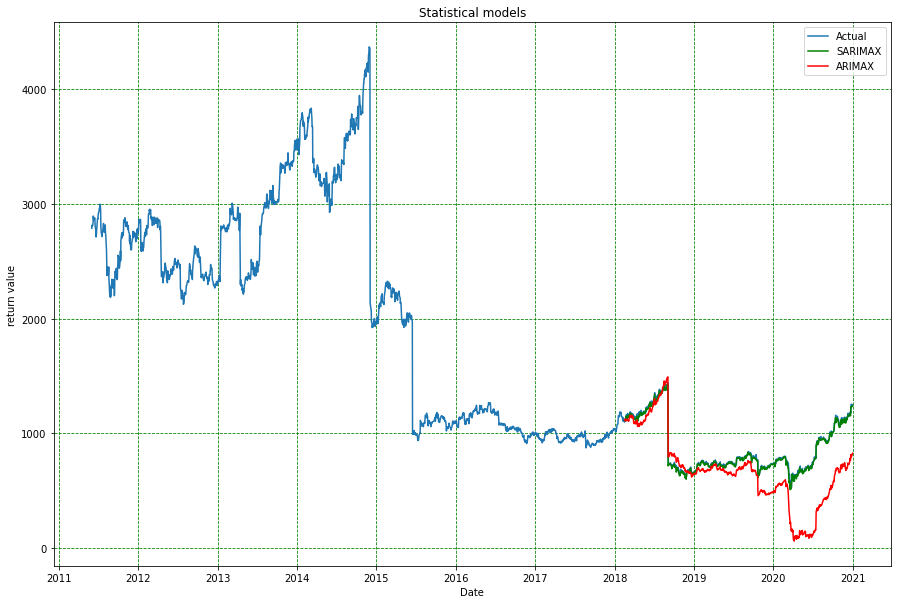

In [1229]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1230]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

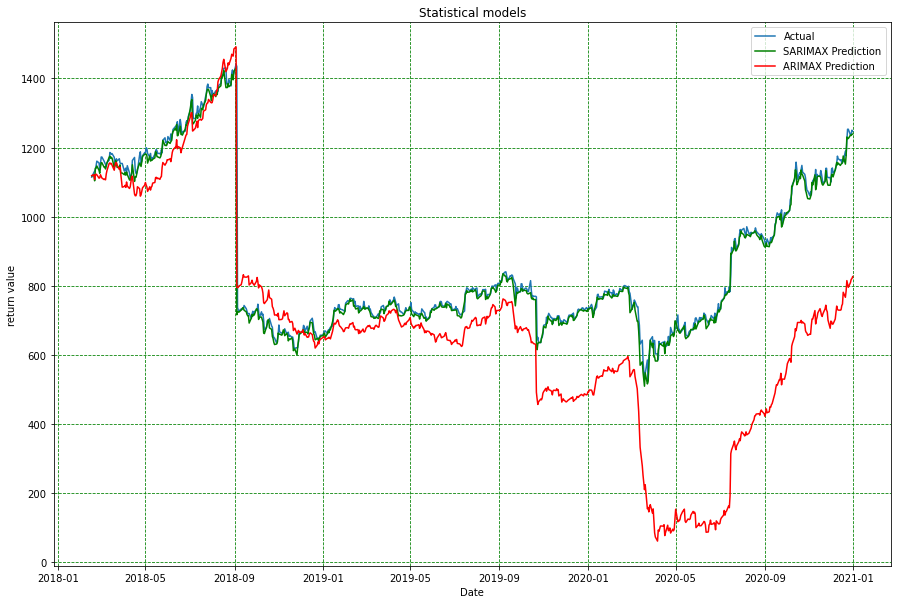

In [1231]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1232]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

287.51530203323506


In [1233]:
error=mean_absolute_error(test,pred_arimax)
print(error)

206.34742651854464


In [1234]:
r2_score(test,pred_arimax)

-0.6194563106525921

    SARIMAX

In [1235]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

30.631374697869326


In [1236]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

11.60819354456117


In [1237]:
r2_score(test,pred_sarimax)

0.9816185280908953